# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9382 Субботин Максим, вариант 36.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t -> +\infty$

## Основные теоретические положения
### Линейная однородная система с периодическими коэффициентами
$
    X'=A(t)X, A(t+T) = A(t), t \geqslant 0
$

Матрица $\Phi(t)={\phi_{ij}, i,j=1,2...n}$ системы выше фундаментальна, если ее столбцы -- линейно независимые решения системы.

Матрица $C$, для которой верно $\Phi(t + T) = \Phi(t)C, \forall t \geqslant 0$, является основной для фундаментальной матрицы $\Phi(t)$.

Спектральный радиус матрицы $A$ - это максимальное по модулю собственное число матрицы $A$. $p(A) = \max{|\lambda_i|}, i=1..n$

## Постановка задачи

Дано дифференциальное уравнение:
$x'' + a(p,t)x = 0, a(p,t) = p + b(t), b(t+T) = b(t)$
где p - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$
\begin{cases}
    u_1'=u_2 \\
    u_2'=-a(p,t)u_1 \\
\end{cases}
$

Здесь $u_1(t) = x(t), u_2(t) = x'(t)$

Необходимо провести исследование устойчивости однородного линейного уравнения.

## Выполнение работы

Имеем функцию $b(t) = t(2-t)$ с периодом $T = 2$

Интервал неустойчивости:  [1.5500000000000005, 2.0500000000000007]


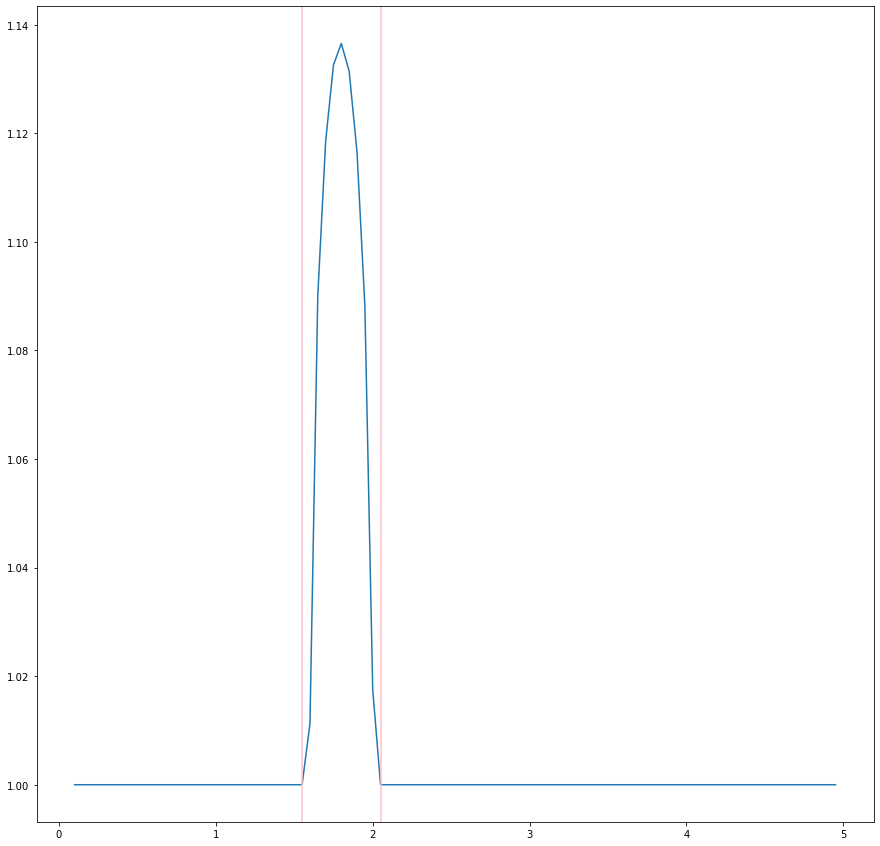

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

p_arr = np.arange(0.1, 5, 0.05)
r_arr = []
v_1 = [1,0]
v_2 = [0,1]
T = 2
a_t = np.arange(0, T, 0.001)

for p in p_arr:
    f = lambda x, t: [x[1], -(p + t*(2-t))*x[0]]
    # решаем две задачи Коши
    sol_1 = odeint(f, v_1, a_t)
    sol_2 = odeint(f, v_2, a_t)
    # матрица С
    C = np.matrix([sol_1[-1], sol_2[-1]]).transpose()
    # спектральный радиус
    radius = np.around(np.max(np.abs(np.linalg.eigvals(C))),5)
    r_arr.append(radius)
    
p_0 = []
flag = True
# находим интервал неустойчивости
for i in range(len(r_arr)):
    if flag == True and r_arr[i] > 1:
        p_0.append(p_arr[i-1])
        flag = False
    elif flag == False and r_arr[i] <= 1:
        p_0.append(p_arr[i])
        flag = True
    
print("Интервал неустойчивости: ", p_0)
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(p_arr, r_arr, label="r(p)")
plt.axvline(x=p_0[0], color="pink")
plt.axvline(x=p_0[1], color="pink")
plt.show()

Тогда на [0.1, 1.55] система устойчива, на (1.55,2.05) система не устойчива и на [2.05, 5] снова устойчива.

## Выводы

Были исследована устойчивость однородного линейного уравнения с периодическими коэффициентами. Из основной матрицы найдены спектральные радиусы при различных параметрах p и интервалы устойчивости и неустойчивости системы.